# Detector

## How to use the Feat Detector class.

*Written by Jin Hyun Cheong*

Here is an example of how to use the `Detector` class to detect faces, facial landmarks, Action Units, and emotions, from face images or videos. 

## Detecting facial expressions from images. 

First, load the detector class. You can specify which models you want to use.

In [1]:
from feat import Detector
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "jaanet"
emotion_model = "fer"
detector = Detector()

Loading Face Detection model:  retinaface
Loading Face Landmark model:  MobileNet
Loading au occurence model:  jaanet
Loading emotion model:  fer


Find the file you want to process. In our case, we'll use our test image `input.jpg`. 

In [4]:
# Find the file you want to process.
from feat.tests.utils import get_test_data_path
import os
test_data_dir = get_test_data_path()
test_image = os.path.join(test_data_dir, "input.jpg")

Here is what our test image looks like.

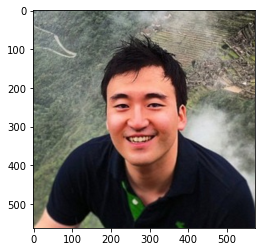

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
f, ax = plt.subplots()
im = Image.open(test_image)
ax.imshow(im);

Now we use our initialized `detector` instance to make predictions with the `detect_image()` method.

In [16]:
image_prediction = detector.detect_image(test_image)
# Show results
image_prediction

/home/jcheong/packages/feat/feat/emo_detectors/ferNet/ferNet_test.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_emo_softmax = nn.functional.softmax(


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,196.976852,140.997742,173.810471,257.639343,0.999681,192.864591,191.586714,192.874615,197.39479,...,0.002872,0.000004,0.001737,0.017439,0.000756,0.94757,0.000364,0.000533,0.031602,/home/jcheong/packages/feat/feat/tests/data/in...


The output is a `Fex` class instance which allows you to run the built-in methods for `Fex`. 

## Visualizing detection results.

For example, you can easily plot the detection results. 

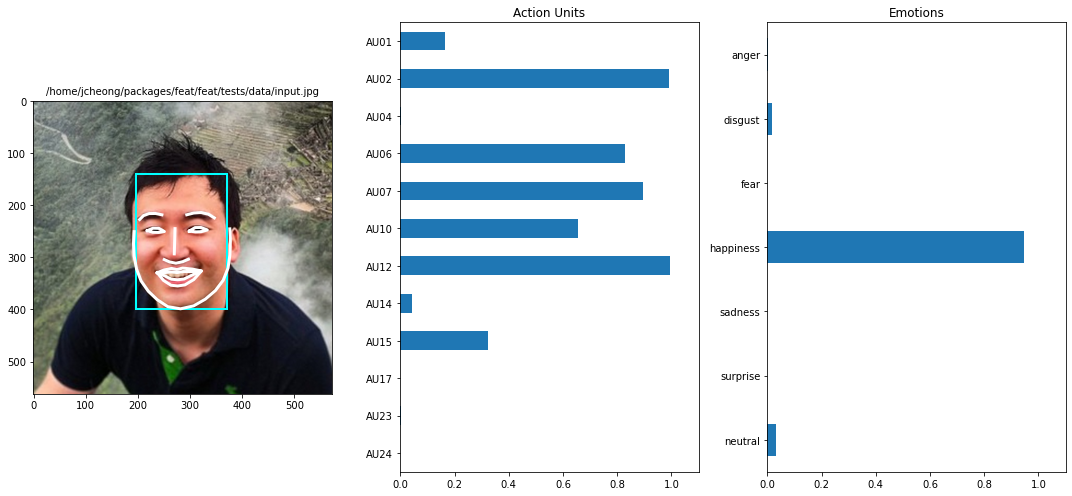

In [18]:
image_prediction.plot_detections();

## Accessing face expression columns of interest.  

You can also access the columns of interests (AUs, emotion) quickly. 

In [21]:
image_prediction.facebox()

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore
0,196.976852,140.997742,173.810471,257.639343,0.999681


In [19]:
image_prediction.aus()

,AU01,AU02,AU04,AU06,AU07,AU10,AU12,AU14,AU15,AU17,AU23,AU24
0,0.16389,0.990565,0.001981,0.827827,0.895377,0.654377,0.995468,0.041832,0.324254,0.000614,0.002872,0.000004


In [22]:
image_prediction.emotions()

,anger,disgust,fear,happiness,sadness,surprise,neutral
0,0.001737,0.017439,0.000756,0.94757,0.000364,0.000533,0.031602


## Detecting facial expressions and saving to a file. 

You can also output the results into file by specifying the `outputFname`. The detector will return `True` when it's finished. 

In [11]:
detector.detect_image(test_image, outputFname = "output.csv")

/home/jcheong/packages/feat/feat/emo_detectors/ferNet/ferNet_test.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_emo_softmax = nn.functional.softmax(


True

## Loading detection results from saved file. 

The outputs can be loaded using our `read_feat()` function or a simple Pandas `read_csv()`. We recommend using `read_feat()` because that will allow you to use the full suite of Feat functionalities more easily.

In [13]:
from feat.utils import read_feat
image_prediction = read_feat("output.csv")
# Show results
image_prediction

,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,196.976852,140.997742,173.810471,257.639343,0.999681,192.864591,191.586714,192.874615,197.39479,...,0.002872,0.000004,0.001737,0.017439,0.000756,0.94757,0.000364,0.000533,0.031602,/home/jcheong/packages/feat/feat/tests/data/in...


In [14]:
import pandas as pd
image_prediction = pd.read_csv("output.csv")
# Show results
image_prediction

,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,196.976852,140.997742,173.810471,257.639343,0.999681,192.864591,191.586714,192.874615,197.39479,...,0.002872,0.000004,0.001737,0.017439,0.000756,0.94757,0.000364,0.000533,0.031602,/home/jcheong/packages/feat/feat/tests/data/in...


# Detecting facial expressions images with many faces. 
Feat's Detector can find multiple faces in a single image. 

In [27]:
test_image = glob.glob(os.path.join(test_data_dir, "tim-mossholder-hOF1bWoet_Q-unsplash.jpg"))
image_prediction = detector.detect_image(test_image)
# Show results
image_prediction

/home/jcheong/packages/feat/feat/emo_detectors/ferNet/ferNet_test.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_emo_softmax = nn.functional.softmax(


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0,683.844116,288.876495,103.788025,134.104675,0.999768,686.784070,684.581417,683.259731,683.543446,...,0.000047,2.072674e-08,0.000488,0.005617,0.000796,0.951391,0.001863,0.004160,0.035685,/home/jcheong/packages/feat/feat/tests/data/ti...
1,0,533.678894,309.400024,96.237732,124.128448,0.999421,536.352311,533.773776,532.264484,532.354007,...,0.000067,2.451054e-09,0.000284,0.006320,0.001193,0.971111,0.000716,0.000561,0.019815,/home/jcheong/packages/feat/feat/tests/data/ti...
2,0,316.984406,233.779205,92.016876,126.462952,0.999196,314.601801,315.569317,317.556657,320.979813,...,0.000409,2.915924e-07,0.000121,0.002568,0.000227,0.899846,0.001718,0.001472,0.094047,/home/jcheong/packages/feat/feat/tests/data/ti...
3,0,221.297470,64.152290,85.109238,109.057457,0.996842,221.084806,218.956038,217.532470,217.588805,...,0.000014,1.441462e-08,0.000620,0.004256,0.000250,0.903749,0.000306,0.002786,0.088032,/home/jcheong/packages/feat/feat/tests/data/ti...
4,0,437.129089,213.861359,79.529785,97.050537,0.996773,439.015782,438.598763,439.106142,440.473301,...,0.000018,4.327078e-09,0.001339,0.018785,0.000607,0.661113,0.047018,0.000741,0.270397,/home/jcheong/packages/feat/feat/tests/data/ti...


## Visualize multiple faces in a single image.

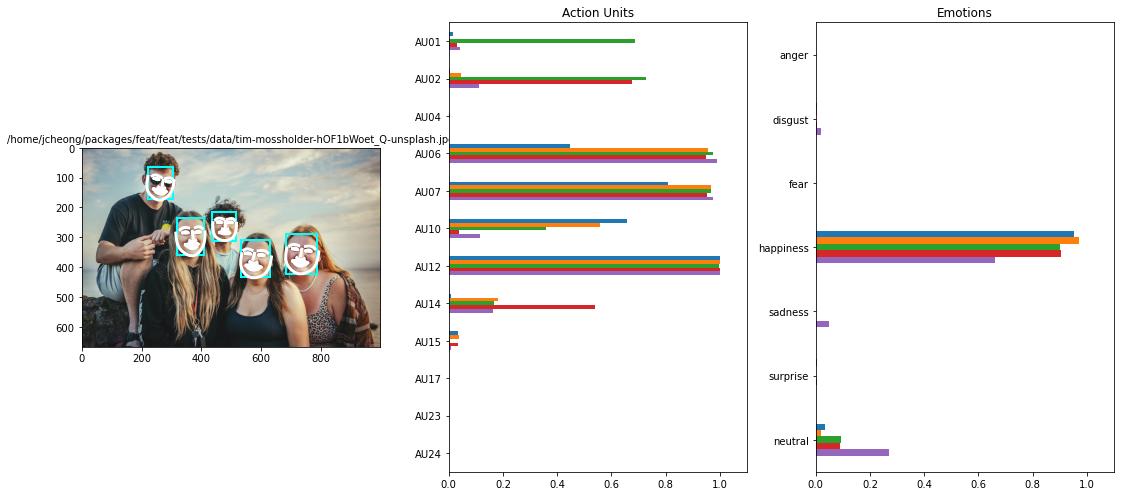

In [28]:
image_prediction.plot_detections();

## Detecting facial expressions from multiple images
You can also detect facial expressions from a list of images. Just place the path to images in a list and pass it to `detect_images`. 

In [5]:
# Find the file you want to process.
from feat.tests.utils import get_test_data_path
import os, glob
test_data_dir = get_test_data_path()
test_images = glob.glob(os.path.join(test_data_dir, "*.jpg"))
print(test_images)

image_prediction = detector.detect_image(test_images)
image_prediction

['/home/jcheong/packages/feat/feat/tests/data/sampler0000.jpg', '/home/jcheong/packages/feat/feat/tests/data/input.jpg', '/home/jcheong/packages/feat/feat/tests/data/tim-mossholder-hOF1bWoet_Q-unsplash.jpg']


/home/jcheong/packages/feat/feat/emo_detectors/ferNet/ferNet_test.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_emo_softmax = nn.functional.softmax(


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,221.921371,451.037781,557.324585,685.556824,0.999933,183.711262,193.365529,208.800660,227.631529,...,0.000367,4.590918e-06,0.003061,0.013231,0.000564,0.676580,0.044113,0.002387,0.260063,/home/jcheong/packages/feat/feat/tests/data/sa...
0,0.0,196.976852,140.997742,173.810471,257.639343,0.999681,192.864591,191.586714,192.874615,197.394790,...,0.002872,3.748603e-06,0.001737,0.017439,0.000756,0.947570,0.000364,0.000533,0.031602,/home/jcheong/packages/feat/feat/tests/data/in...
0,0.0,683.844116,288.876495,103.788025,134.104675,0.999768,686.784070,684.581417,683.259731,683.543446,...,0.000047,2.072674e-08,0.000488,0.005617,0.000796,0.951391,0.001863,0.004160,0.035685,/home/jcheong/packages/feat/feat/tests/data/ti...
1,0.0,533.678894,309.400024,96.237732,124.128448,0.999421,536.352311,533.773776,532.264484,532.354007,...,0.000067,2.451054e-09,0.000284,0.006320,0.001193,0.971111,0.000716,0.000561,0.019815,/home/jcheong/packages/feat/feat/tests/data/ti...
2,0.0,316.984406,233.779205,92.016876,126.462952,0.999196,314.601801,315.569317,317.556657,320.979813,...,0.000409,2.915924e-07,0.000121,0.002568,0.000227,0.899846,0.001718,0.001472,0.094047,/home/jcheong/packages/feat/feat/tests/data/ti...
3,0.0,221.297470,64.152290,85.109238,109.057457,0.996842,221.084806,218.956038,217.532470,217.588805,...,0.000014,1.441462e-08,0.000620,0.004256,0.000250,0.903749,0.000306,0.002786,0.088032,/home/jcheong/packages/feat/feat/tests/data/ti...
4,0.0,437.129089,213.861359,79.529785,97.050537,0.996773,439.015782,438.598763,439.106142,440.473301,...,0.000018,4.327078e-09,0.001339,0.018785,0.000607,0.661113,0.047018,0.000741,0.270397,/home/jcheong/packages/feat/feat/tests/data/ti...


When you have multiple images, you can still call the plot_detection which will plot results for all input images. If you have a lot of images, we recommend checking one by one using slicing. 

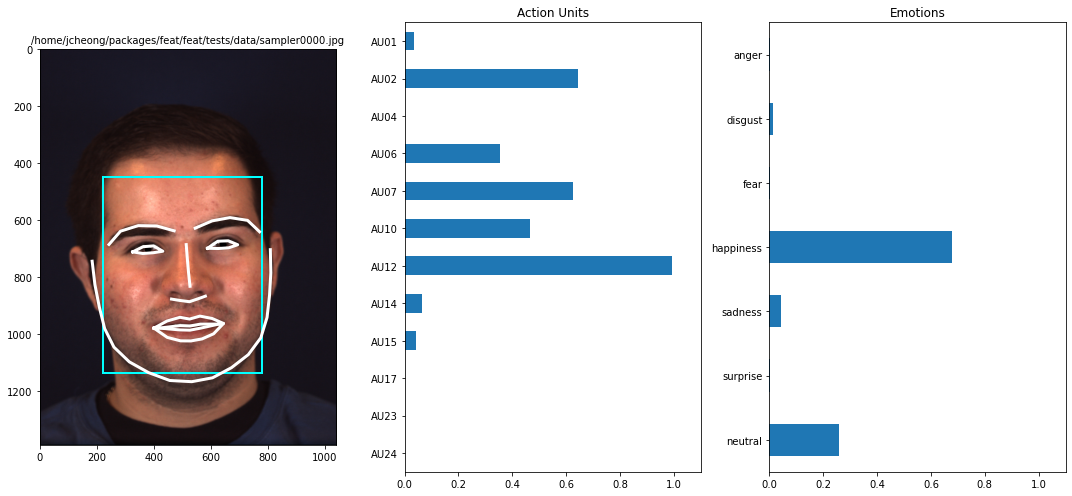

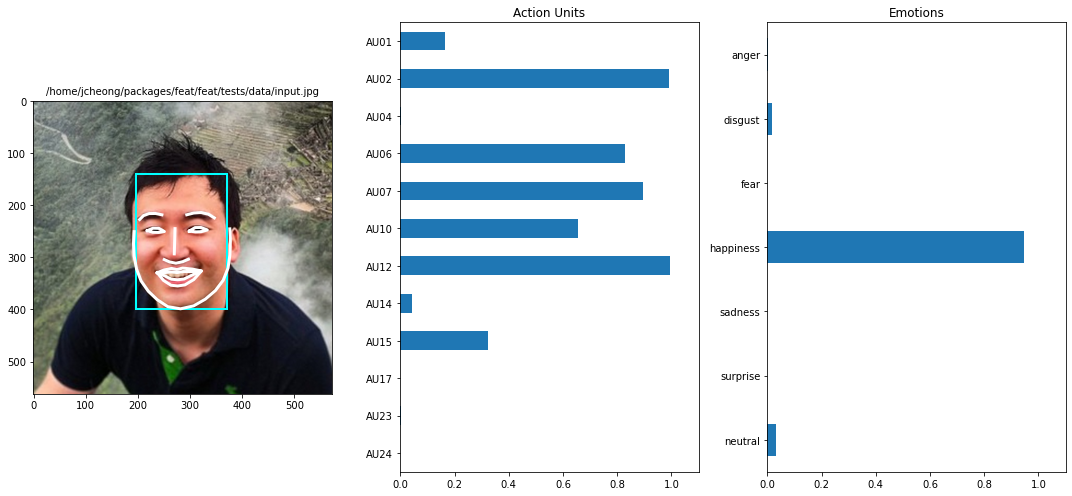

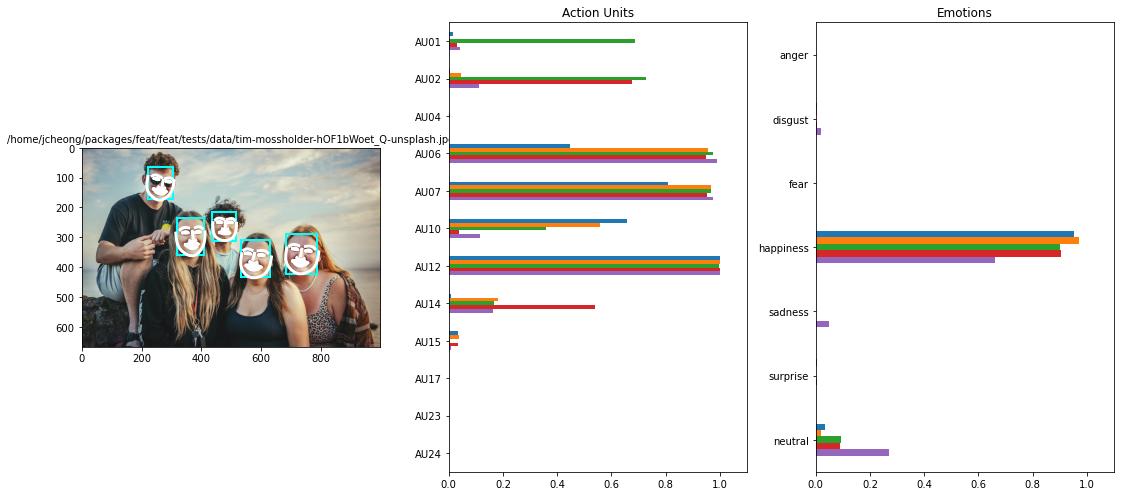

In [6]:
image_prediction.plot_detections();

You can use the slicing function to plot specific rows in the detection results. 

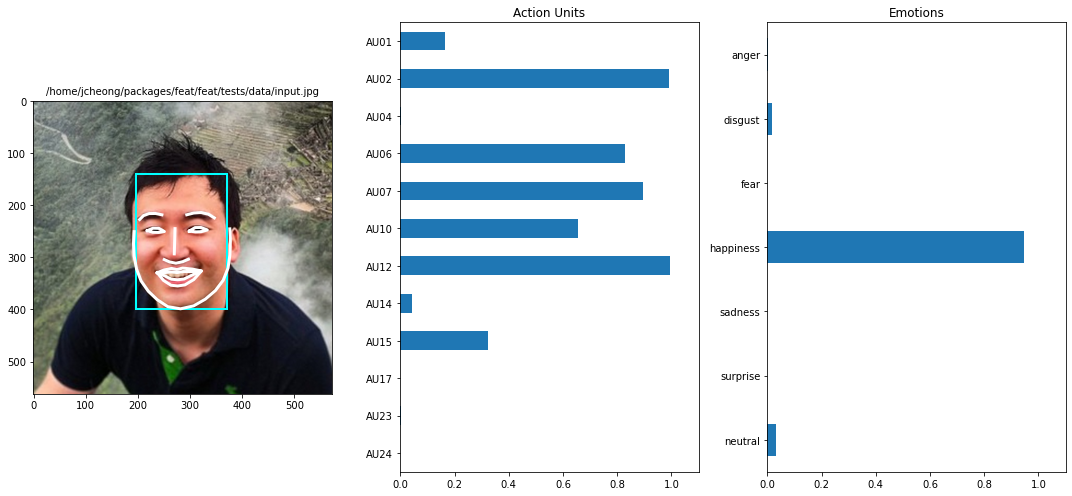

In [7]:
image_prediction.iloc[[1]].plot_detections();

## Detecting facial expressions from videos. 
Detecting facial expressions in videos is also easy by using the `detect_video()` method. 

In [2]:
# Find the file you want to process.
from feat.tests.utils import get_test_data_path
import os, glob
test_data_dir = get_test_data_path()
test_video = os.path.join(test_data_dir, "input.mp4")

video_prediction = detector.detect_video(test_video)
video_prediction

/home/jcheong/packages/feat/feat/emo_detectors/ferNet/ferNet_test.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_emo_softmax = nn.functional.softmax(


exception occurred


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,225.785461,79.790741,143.439087,219.655396,0.997335,220.742497,221.692862,224.857535,229.261025,...,0.005269,1.499276e-04,0.002553,0.041428,0.000036,0.017561,0.018628,0.001683,0.918109,/home/jcheong/packages/feat/feat/tests/data/in...
1,1.0,224.340897,78.703629,144.191849,219.749008,0.997304,220.251151,221.300561,224.537239,229.189427,...,0.000457,1.689635e-05,0.001981,0.031548,0.000029,0.029420,0.016667,0.001307,0.919048,/home/jcheong/packages/feat/feat/tests/data/in...
2,2.0,224.216888,77.929291,143.509094,219.101410,0.997589,219.232944,220.174571,223.311931,227.716826,...,0.000522,1.598743e-05,0.002754,0.038495,0.000032,0.020972,0.017380,0.001545,0.918821,/home/jcheong/packages/feat/feat/tests/data/in...
3,3.0,222.698547,76.241852,143.943573,219.770996,0.997615,217.720875,218.875998,222.267570,226.994234,...,0.001272,4.804263e-06,0.002297,0.034045,0.000032,0.020861,0.016214,0.001443,0.925108,/home/jcheong/packages/feat/feat/tests/data/in...
4,4.0,221.974640,75.179489,143.789886,219.539566,0.997622,216.369104,217.718976,221.307682,226.181800,...,0.001141,4.706220e-06,0.001542,0.028211,0.000026,0.022798,0.014205,0.001088,0.932130,/home/jcheong/packages/feat/feat/tests/data/in...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68.0,223.307953,74.997276,144.260864,218.014557,0.996670,221.039651,221.099032,222.813766,226.137859,...,0.004682,8.720773e-07,0.003516,0.005621,0.000194,0.951460,0.002367,0.001372,0.035471,/home/jcheong/packages/feat/feat/tests/data/in...
69,69.0,225.147324,74.119179,143.346451,219.001526,0.997324,221.613964,221.922074,223.921006,227.272990,...,0.004952,9.057054e-07,0.003108,0.007228,0.000125,0.936315,0.002690,0.000900,0.049634,/home/jcheong/packages/feat/feat/tests/data/in...
70,70.0,226.097931,71.899506,143.430267,220.504547,0.997038,222.620859,223.299977,225.683107,229.456949,...,0.000979,3.374264e-07,0.002443,0.029436,0.000107,0.561698,0.011160,0.001887,0.393268,/home/jcheong/packages/feat/feat/tests/data/in...
71,71.0,226.351257,73.378296,144.113678,216.857239,0.997415,222.566655,223.279779,225.846337,229.603299,...,0.000200,2.243794e-06,0.001919,0.024612,0.000014,0.190274,0.014294,0.000440,0.768446,/home/jcheong/packages/feat/feat/tests/data/in...


You can also plot the detection results from a video. The frames are not extracted from the video (that will result in thousands of images) so the visualization only shows the detected face without the underlying image.

Input image /home/jcheong/packages/feat/feat/tests/data/input.mp4 not found.


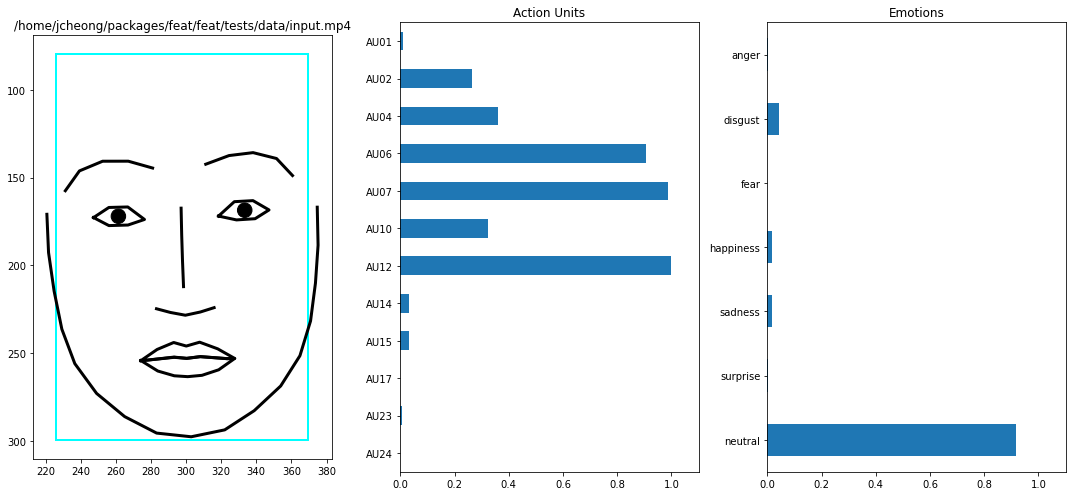

In [4]:
video_prediction.iloc[[0]].plot_detections();

In situations you don't need predictions for EVERY frame of the video, you can specify how many frames to skip with `skip_frames`.

In [8]:
video_prediction = detector.detect_video(test_video, skip_frames=20)
video_prediction

/home/jcheong/packages/feat/feat/emo_detectors/ferNet/ferNet_test.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_emo_softmax = nn.functional.softmax(


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,225.785461,79.790741,143.439087,219.655396,0.997335,220.742497,221.692862,224.857535,229.261025,...,0.005269,1.499276e-04,0.002553,0.041428,0.000036,0.017561,0.018628,0.001683,0.918109,/home/jcheong/packages/feat/feat/tests/data/in...
20,20.0,221.230301,72.924423,145.104263,218.800369,0.997405,217.824738,217.966902,219.744936,223.301323,...,0.002898,2.599955e-07,0.002291,0.004509,0.000186,0.970820,0.001761,0.000882,0.019552,/home/jcheong/packages/feat/feat/tests/data/in...
40,40.0,222.305145,71.947517,143.455597,218.401245,0.996271,217.340510,217.315728,218.900354,222.455399,...,0.009150,3.194340e-06,0.005507,0.008199,0.000283,0.936992,0.003926,0.002664,0.042429,/home/jcheong/packages/feat/feat/tests/data/in...
60,60.0,221.634705,71.399429,142.981506,217.118454,0.996953,217.609933,217.592436,219.237523,222.668597,...,0.007433,3.049727e-06,0.008578,0.009447,0.000175,0.936682,0.001617,0.002478,0.041023,/home/jcheong/packages/feat/feat/tests/data/in...
